### Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transaction s. We have to build a classification model to predict whether a transaction is fraudulent or not.

# Load Data and Read Data 

In [1]:
import pandas as pd 

df = pd.read_csv('creditcard.csv')

In [2]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis (EDA) & Data cleaning

In [3]:
df.head()   #to check some initial records of dataset . By default head() is showing 5 records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.shape)  # To check the dimensions of dataset 
print("So total {} rows and {} columns.".format(df.shape[0],df.shape[1]))

(284807, 31)
So total 284807 rows and 31 columns.


In [5]:
# Data Quality Check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(df.isnull().sum()) # check missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no null values in the given dataset. So, no need to work on null values in dataset.

In [7]:
# df.duplicated().sum()

In [8]:
# drop duplicates
# df = df.drop_duplicates()

In [9]:
# df.shape   # This is new datashape

# Preprocessing and Feature Engineering

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

##### 0 --> Normal Transactions
##### 1 --> Fraudulent Transactions
##### This dataset is highly Unbalanced as it contains more than 99% of normal transactions and less than 1% fraudulent transactions and on training this dataset will result in giving only normal transaction as every transaction.

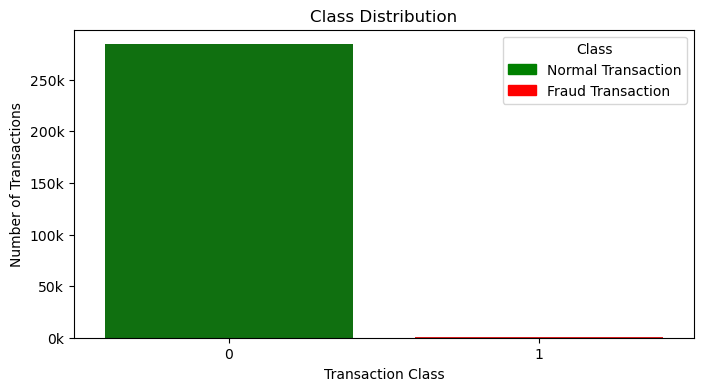

In [11]:
# Visualization of fraud vs non-fraud transactions
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis numbers as 'k' for thousands
def thousands_formatter(X, pos):
    return f'{int(X/1000)}k'

# Set custom colors: green for non-fraud (0) and red for fraud (1)
colors = {0: 'green', 1: 'red'}

plt.figure(figsize=(8, 4))
sns_plot = sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution')

# Add labels for the x-axis and y-axis
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')

# Format the y-axis ticks to show 'k' for thousands
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add a custom legend to indicate the colors
handles = [plt.Rectangle((0,0),1,1, color='green', label='Normal Transaction'),
           plt.Rectangle((0,0),1,1, color='red', label='Fraud Transaction')]
plt.legend(handles=handles, title='Class', loc='upper right')

plt.show()

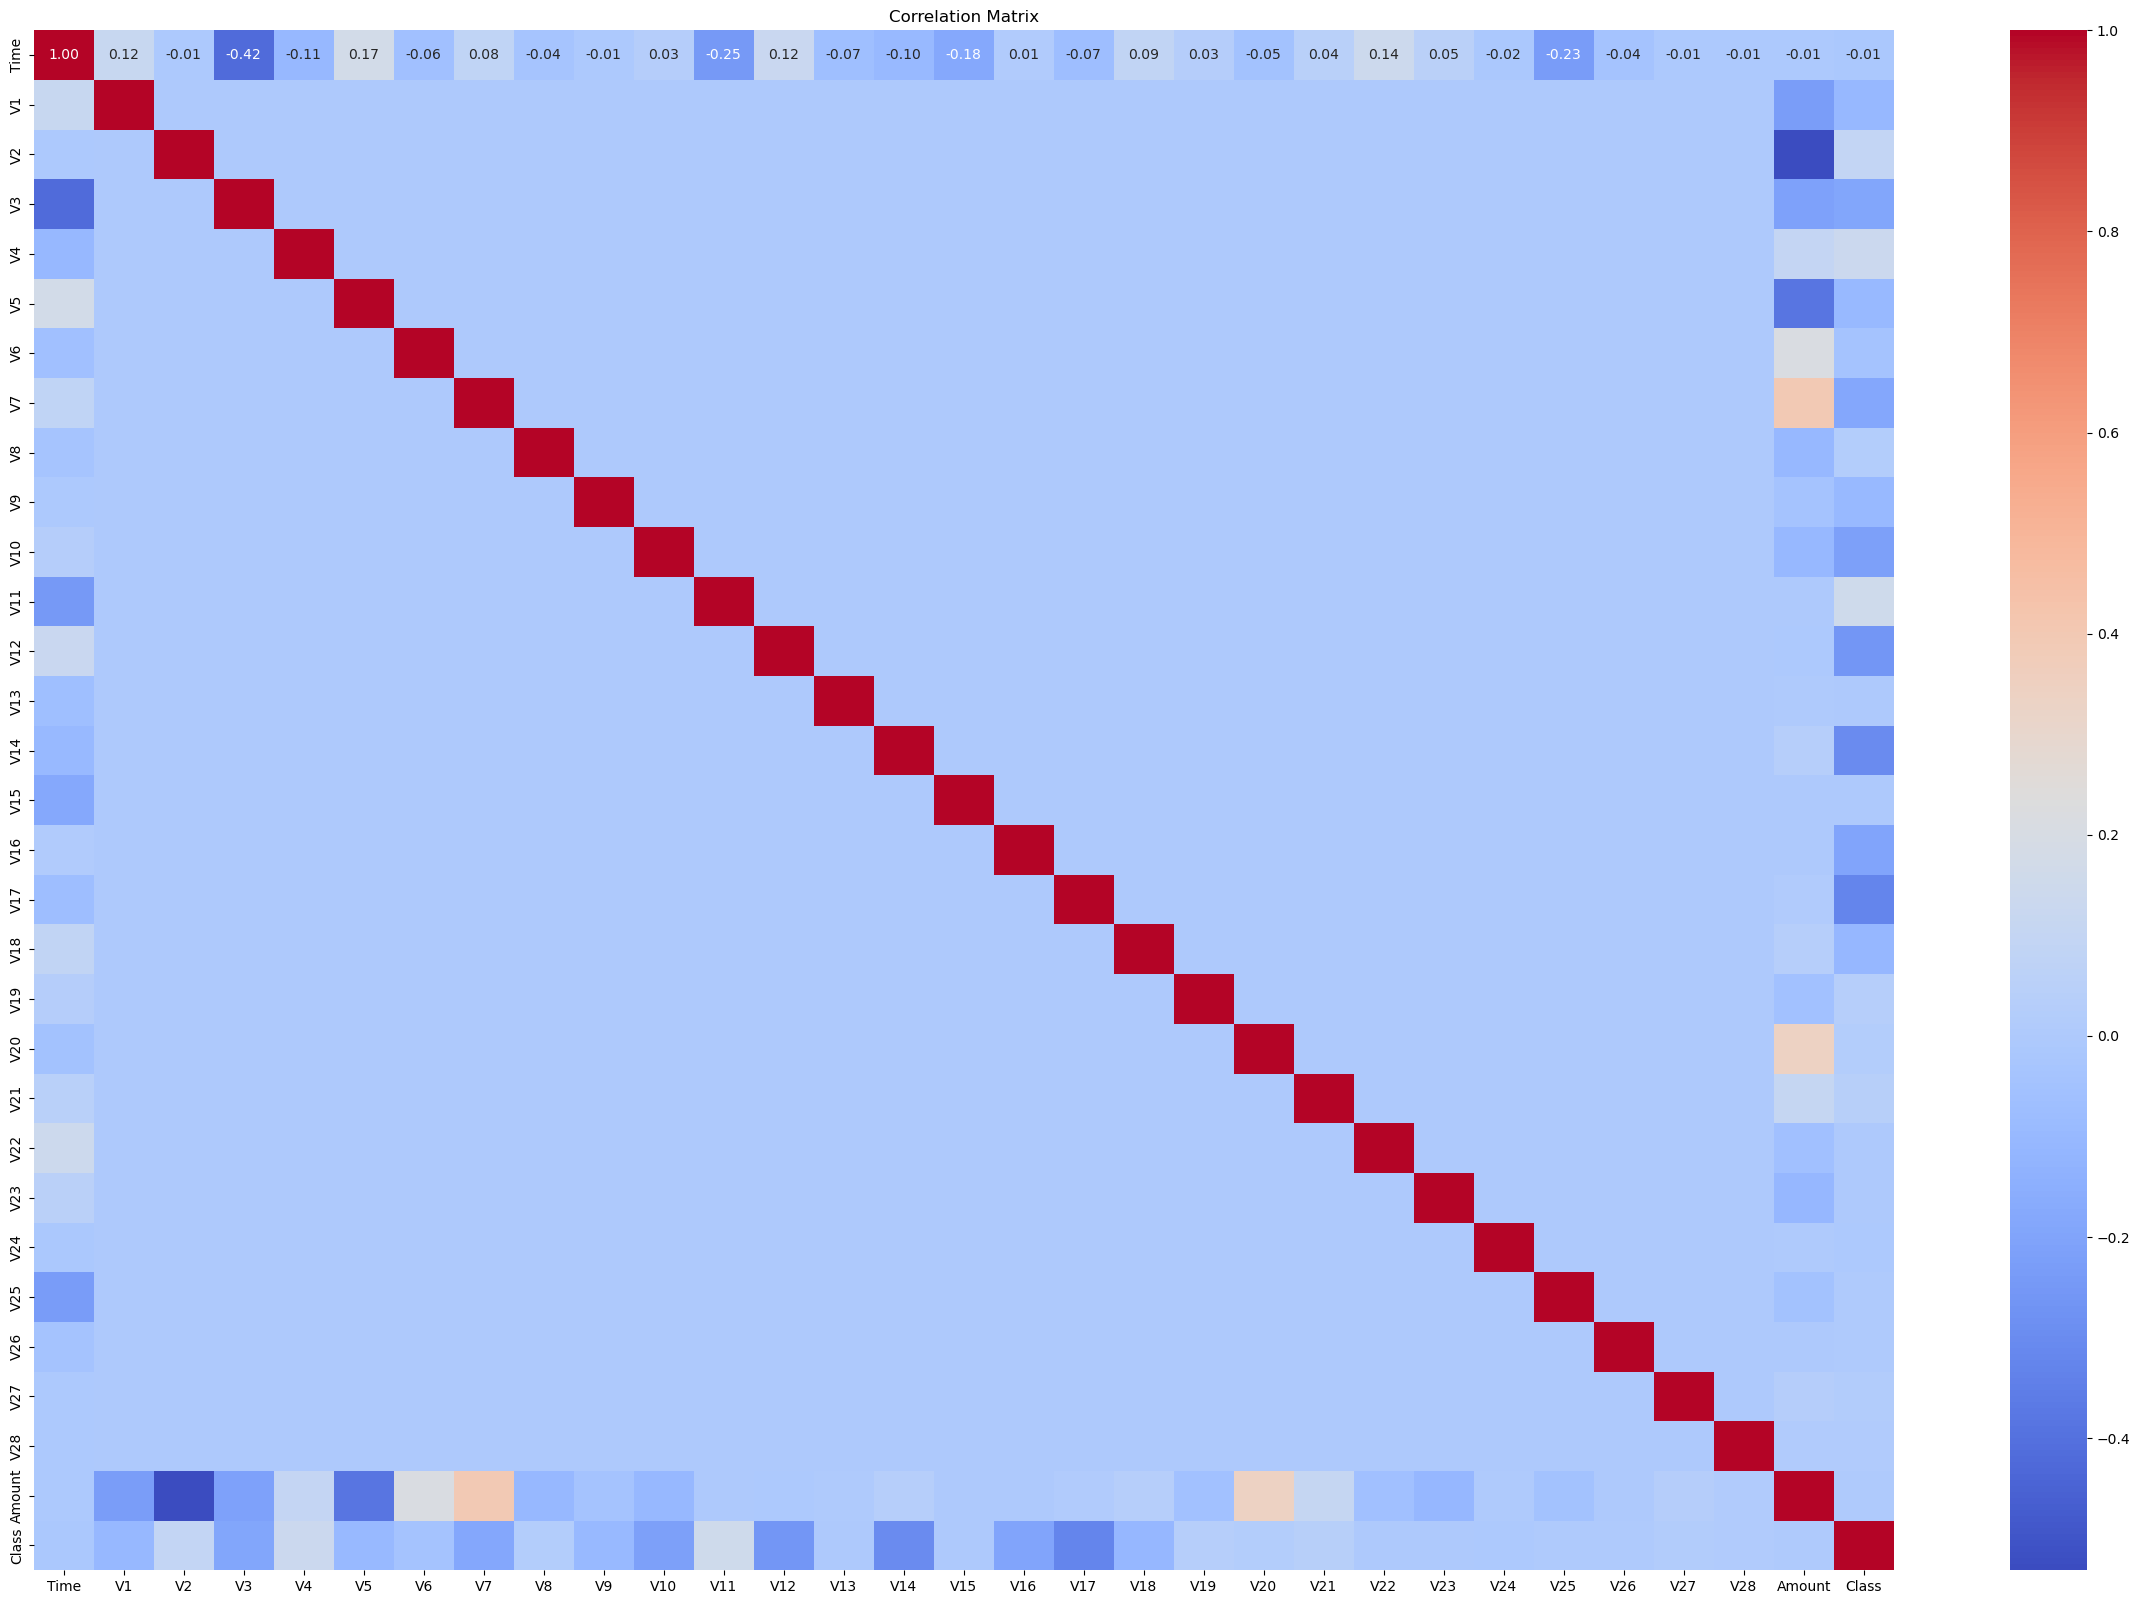

In [12]:
# Plotting Heatmap for above Correlation
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

#### Seprating the data for analysis

In [13]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [14]:
legit.shape    # Dimension of Legit transaction

(284315, 31)

In [15]:
fraud.shape  # Dimension of Fraud transaction

(492, 31)

Statistical measures of the data

In [16]:
legit.Amount.describe()      # Display descriptive statistics with background gradient

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Compare the values for both transactions

In [18]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


To solve above described problem, we will use concept of Under-sampling further

# Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent transactions.

Number of Fraudulent transactions --> 473

In [19]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler


In [20]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

In [21]:
# Implementing UnderSampling to handle imbalanced dataset
rus=RandomUnderSampler(random_state=42,sampling_strategy=1)
X_sample,y_sample=rus.fit_resample(X,Y)
X_sample.shape

(984, 30)

In [22]:
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(predictions=True)
# models, predictions = clf.fit(X, X_sample, Y, y_sample)

In [23]:
#models

From above table we will know different types of models and Accuracy for that models so we will keep going for those models whose accuracy is 1 it means 100%. But we start from LogisticReression 

In [24]:
y_sample.shape

(984,)

In [25]:
y_sample.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

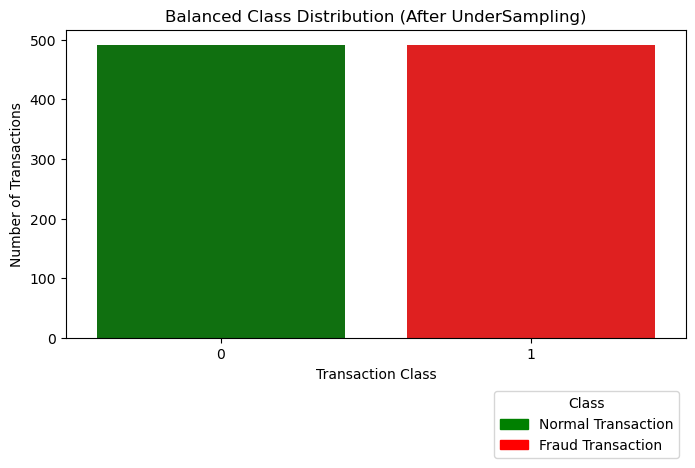

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine X_sample and Y_sample for visualization purposes
df_sample = pd.DataFrame({'Class': y_sample})

# Set custom colors: green for non-fraud (0) and red for fraud (1)
colors = {0: 'green', 1: 'red'}

plt.figure(figsize=(8, 4))

# Use Y_sample to plot the balanced class distribution
sns_plot = sns.countplot(x='Class', data=df_sample, palette=colors)
plt.title('Balanced Class Distribution (After UnderSampling)')

# Add labels for the x-axis and y-axis
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')

# Format the y-axis ticks to show actual numbers instead of 'k' for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}'))

# Add a custom legend to indicate the colors, adjust legend position
handles = [plt.Rectangle((0,0),1,1, color='green', label='Normal Transaction'),
           plt.Rectangle((0,0),1,1, color='red', label='Fraud Transaction')]
plt.legend(handles=handles, title='Class', loc='upper right', bbox_to_anchor=(1, -0.15))

plt.show()


In [27]:
# # Correct imports
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Separating features (X) and target variable (y)
# X = df.drop(columns='Class', axis=1)
# y = df['Class']

# # Applying SMOTE to handle imbalanced dataset
# smote = SMOTE(random_state=42, sampling_strategy=1.0)
# X_smote, y_smote = smote.fit_resample(X, y)

# # Checking the shape after SMOTE
# print(X_smote.shape)
# print(y_smote.value_counts())

# # Splitting the SMOTE-generated data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# # Using LazyClassifier to fit on the SMOTE data
# #clf = LazyClassifier(predictions=True)
# #models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# # Checking the value counts after SMOTE
# print(y_smote.shape)
# print(y_smote.value_counts())

# # Plotting balanced class distribution after SMOTE
# df_smote = pd.DataFrame({'Class': y_smote})

# # Set custom colors: green for non-fraud (0) and red for fraud (1)
# colors = {0: 'green', 1: 'red'}

# plt.figure(figsize=(8, 4))
# sns_plot = sns.countplot(x='Class', data=df_smote, palette=colors)
# plt.title('Balanced Class Distribution (After SMOTE)')
# plt.xlabel('Transaction Class')
# plt.ylabel('Number of Transactions')

# # Format the y-axis ticks to show actual numbers instead of 'k' for thousands
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}'))

# # Custom legend to indicate the colors, adjust legend position
# handles = [plt.Rectangle((0,0),1,1, color='green', label='Normal Transaction'),
#            plt.Rectangle((0,0),1,1, color='red', label='Fraud Transaction')]
# plt.legend(handles=handles, title='Class', loc='upper right', bbox_to_anchor=(1, -0.15))

# plt.show()


Now, the dataset is balanced with 284315 each data containing normal and Fraudulent transactions.

In [28]:
# # Necessary imports for data manipulation
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Assuming df is your DataFrame and 'Class' is the target column
# X = df.drop(columns='Class', axis=1)
# y = df['Class']

# # Step 1: Apply SMOTE to handle the imbalanced dataset
# smote = SMOTE(random_state=42, sampling_strategy=1.0)
# X_smote, y_smote = smote.fit_resample(X, y)

# # Step 2: Split the data into Training (60%) and Temporary (40%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

# # Step 3: Split the Temporary set into Validation (20%) and Test (20%) sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Check the shapes to confirm the splits
# print(f"Training Set: {X_train.shape}, {y_train.shape}")
# print(f"Validation Set: {X_val.shape}, {y_val.shape}")
# print(f"Test Set: {X_test.shape}, {y_test.shape}")


In [29]:
# # Necessary imports for machine learning models
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Defining a dictionary to store the models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "SVM": SVC(random_state=42),
#     "KNN": KNeighborsClassifier()
# }

# # Looping through the models and training them on Training Set, validating on Validation Set
# for name, model in models.items():
#     # Training the model
#     model.fit(X_train, y_train)
    
#     # Making predictions on the Validation set
#     y_pred_val = model.predict(X_val)
    
#     # Model evaluation on Validation Set
#     print(f"Model: {name}")
#     print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
#     print("Classification Report on Validation Set:")
#     print(classification_report(y_val, y_pred_val))
#     print("Confusion Matrix on Validation Set:")
#     print(confusion_matrix(y_val, y_pred_val))
#     print("-" * 60)


# Training, Validation and Test Sets

In [30]:
from sklearn.model_selection import train_test_split

Splitting the data into Features and Targets

In [31]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [32]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Splitting the data into Training and Testing Data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sample,y_sample,test_size=.2,stratify=y_sample,random_state=42)

In [34]:
X.shape,X_train.shape,X_test.shape

((284807, 30), (787, 30), (197, 30))

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression(solver='liblinear')

Training the Logistic Regression model with training data

In [37]:
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [38]:
print(model.coef_.tolist())

[[-2.063413570407246e-05, -0.0890273866489506, 0.08323868573040129, -0.29925440034994016, 0.3438062691311691, 0.07759198308615502, -0.09035139586774363, -0.10210456568504157, -0.1060178717900254, -0.0963506209069056, -0.21380341742303197, 0.11692578807348201, -0.22016417049595272, -0.08189425111371748, -0.40787644835802905, -0.053919657469551616, -0.07123825002570752, -0.04995057705452331, 0.04294975775218757, -0.010542553730415412, -0.0017930669087749078, 0.02915724768631946, 0.030388129213966778, -0.02235570816177773, 0.009776790542628588, -0.02261089518537429, 0.002562348467744954, 0.004933330168408291, 0.012023667488628946, 0.0011374577355453396]]


In [39]:
n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    'feature':X.columns.tolist(),
    'weight':model.coef_.tolist()[0]
})

In [40]:
weight_df.head(10)

,feature,weight
0,Time,-0.000021
1,V1,-0.089027
2,V2,0.083239
3,V3,-0.299254
4,V4,0.343806
5,V5,0.077592
6,V6,-0.090351
7,V7,-0.102105
8,V8,-0.106018
9,V9,-0.096351


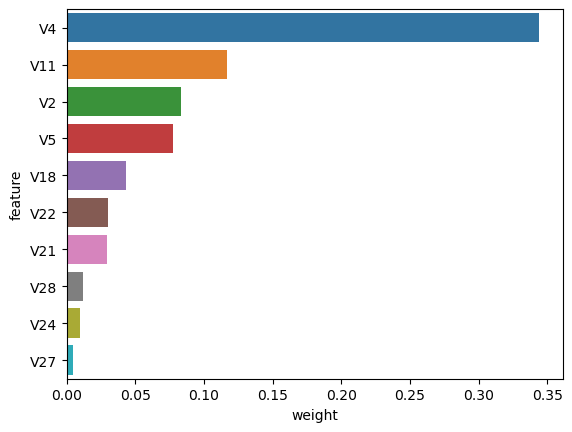

In [41]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10),
            x='weight',y='feature');

This line uses the Seaborn library to create a bar plot that visualizes the top 10 features based on their weights.
weight_df.sort_values('weight', ascending=False) sorts the DataFrame by the weight column in descending order.
The head(10) method selects the top 10 features with the highest weights.

In [42]:
print(model.intercept_)

[-0.07578589]


# Model Evaluation

## Accuracy Score

In [43]:
from sklearn.metrics import accuracy_score,classification_report

Accuracy on Training data

In [44]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [45]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.9313850063532402


The model achieves an accuracy of 92.4% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(Y_train,X_train_prediction,normalize='true')

array([[0.97201018, 0.02798982],
       [0.10913706, 0.89086294]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [48]:
def predict_and_plot(inputs,targets,name=''):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 93.14%


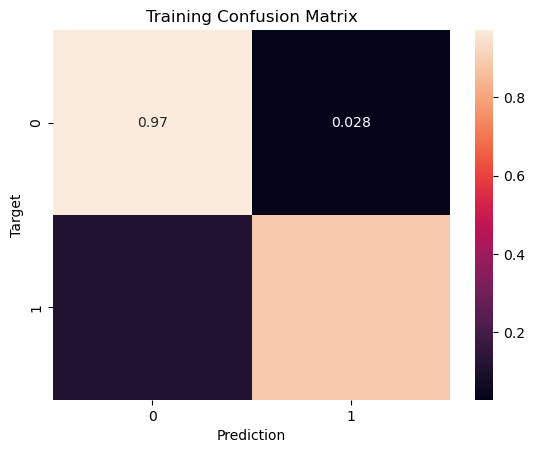

In [49]:
X_train_prediction=predict_and_plot(X_train,Y_train,'Training')

Accuracy: 95.43%


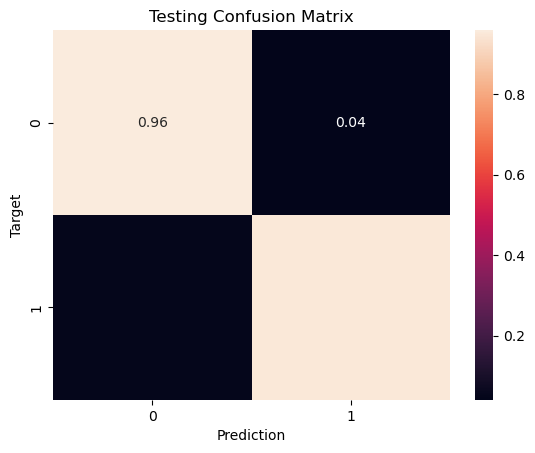

In [50]:
X_test_prediction=predict_and_plot(X_test,Y_test,'Testing')

Accuracy on Test data

In [51]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [52]:
print('Accuracy on Testing data: ',testing_data_accuracy)

Accuracy on Testing data:  0.9543147208121827


In [53]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_true are your actual labels and y_pred are your predictions
accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


Accuracy score of both Training and Testing data is close to each other and above 90% which is good sign that our model is not over-fitted or under-fitted.

## Training and Visualizing Decision Trees

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model=DecisionTreeClassifier(random_state=42)

In [57]:
%%time
model.fit(X_train,Y_train)

Wall time: 25.9 ms


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [60]:
X_train_prediction

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [61]:
pd.value_counts(X_train_prediction)

C:\Users\Suraj_Hotkar\AppData\Local\Temp\ipykernel_19764\3027833930.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(X_train_prediction)


1    394
0    393
Name: count, dtype: int64

In [62]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  1.0


The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [63]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [64]:
print('Accuracy on Testing data: ',testing_data_accuracy)

Accuracy on Testing data:  0.9086294416243654


Although the training accuracy is 100%, the accuracy on the validation set is just about 90.5%, which is much better then always predicting "Yes".

In [65]:
X_test_prediction

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [66]:
pd.value_counts(X_test_prediction)/len(X_test_prediction)

C:\Users\Suraj_Hotkar\AppData\Local\Temp\ipykernel_19764\362203858.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(X_test_prediction)/len(X_test_prediction)


1    0.517766
0    0.482234
Name: count, dtype: float64

Accuracy score of both Training and Testing data is close to each other and above 85% which is good sign that our model is not over-fitted or under-fitted.

### Visualization

We can visualize the decision tree learned from the training data.

In [67]:
from sklearn.tree import plot_tree,export_text

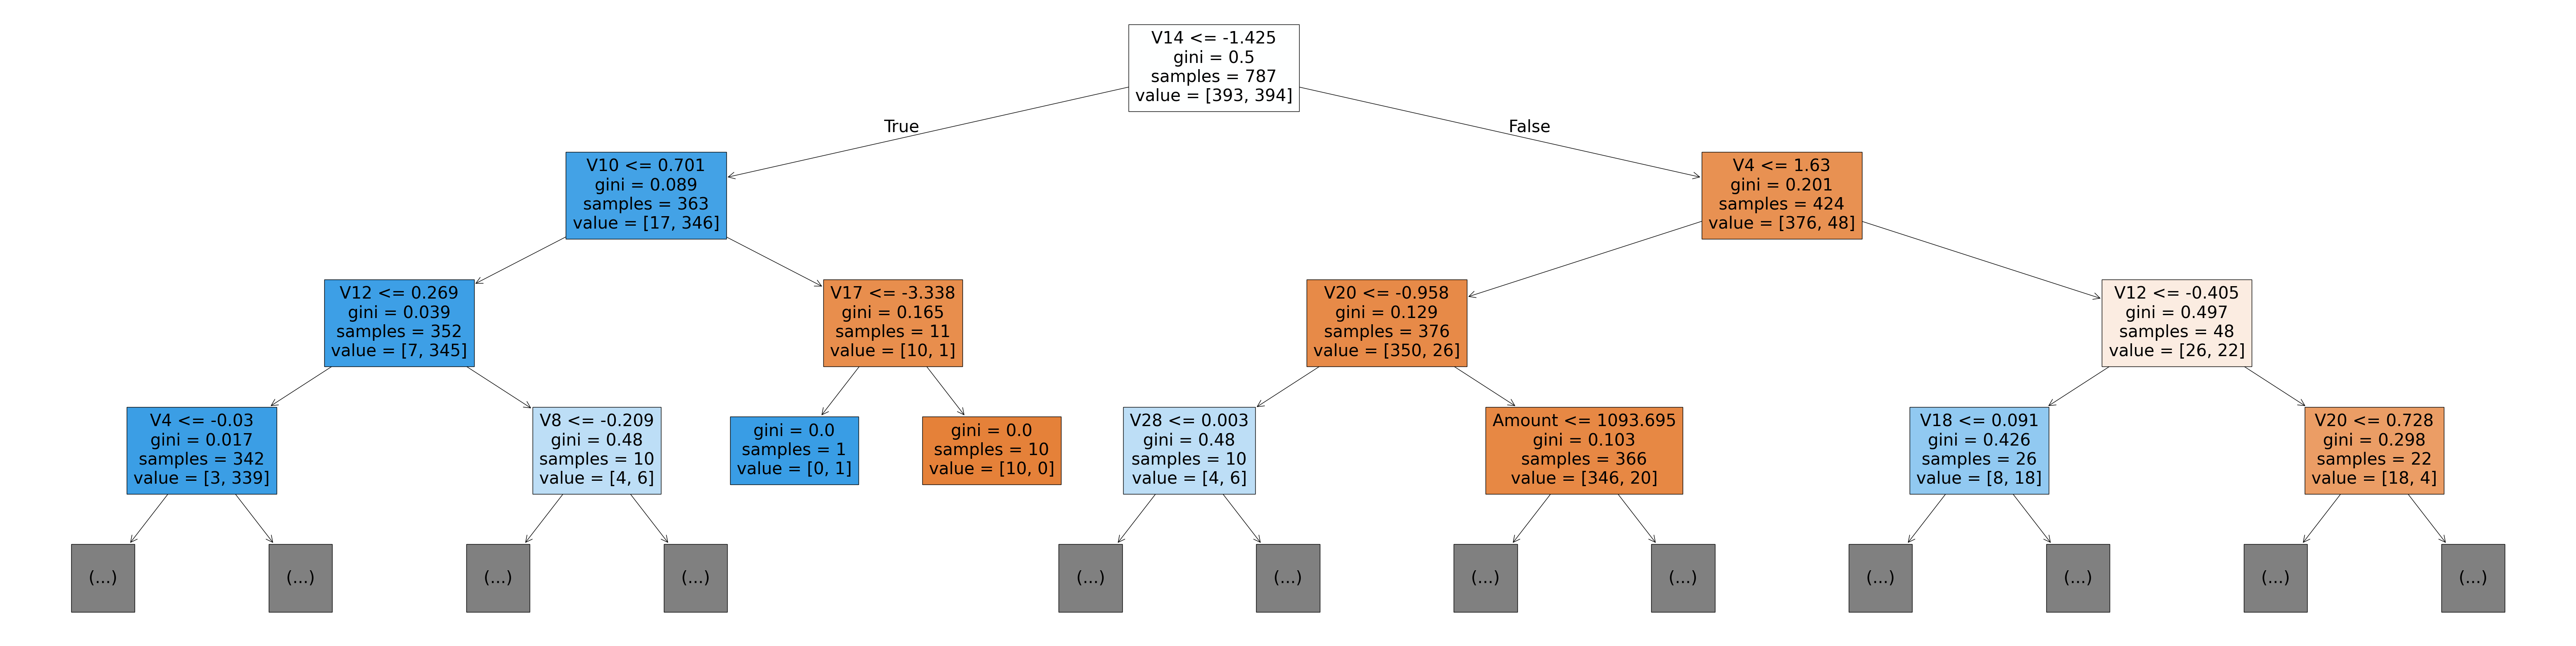

In [68]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True);

In [69]:
model.tree_.max_depth

12

We can also display the tree as text, which can be easier to follow for deeper trees.

In [70]:
tree_text=export_text(model,max_depth=5,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- V14 <= -1.42
|   |--- V10 <= 0.70
|   |   |--- V12 <= 0.27
|   |   |   |--- V4 <= -0.03
|   |   |   |   |--- V20 <= 0.18
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V20 >  0.18
|   |   |   |   |   |--- class: 0
|   |   |   |--- V4 >  -0.03
|   |   |   |   |--- V12 <= -0.22
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V12 >  -0.22
|   |   |   |   |   |--- V25 <= 0.83
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V25 >  0.83
|   |   |   |   |   |   |--- class: 0
|   |   |--- V12 >  0.27
|   |   |   |--- V8 <= -0.21
|   |   |   |   |--- class: 1
|   |   |   |--- V8 >  -0.21
|   |   |   |   |--- Time <= 164357.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Time >  164357.50
|   |   |   |   |   |--- class: 1
|   |--- V10 >  0.70
|   |   |--- V17 <= -3.34
|   |   |   |--- class: 1
|   |   |--- V17 >  -3.34
|   |   |   |--- class: 0
|--- V14 >  -1.42
|   |--- V4 <= 1.63
|   |   |--- V20 <= -0.96
|   |   |   |--- V28 <= 0.00
|   |   |   |  

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [71]:
model.feature_importances_

array([0.01239466, 0.00425211, 0.00451787, 0.00814893, 0.03857984,
       0.        , 0.        , 0.00492366, 0.00813216, 0.        ,
       0.04667845, 0.        , 0.02405325, 0.01488823, 0.70702731,
       0.00495833, 0.        , 0.02742581, 0.01149015, 0.00116016,
       0.03332478, 0.00245233, 0.        , 0.00610618, 0.        ,
       0.01898768, 0.0025413 , 0.        , 0.01219824, 0.00575858])

Let's turn this into a dataframe and visualize the most important features.

In [72]:
importance_df=pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [73]:
importance_df.head(10)

,feature,importance
14,V14,0.707027
10,V10,0.046678
4,V4,0.038580
20,V20,0.033325
17,V17,0.027426
12,V12,0.024053
25,V25,0.018988
13,V13,0.014888
0,Time,0.012395
28,V28,0.012198


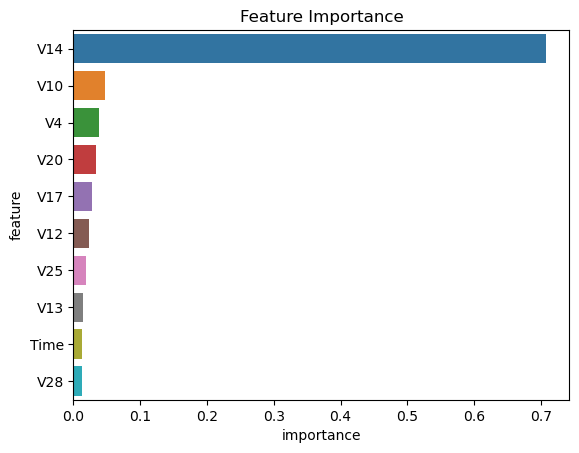

In [74]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

 We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(Y_train,X_train_prediction,normalize='true')

array([[1., 0.],
       [0., 1.]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [77]:
def predict_and_plot(inputs,targets,name=''):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 100.00%


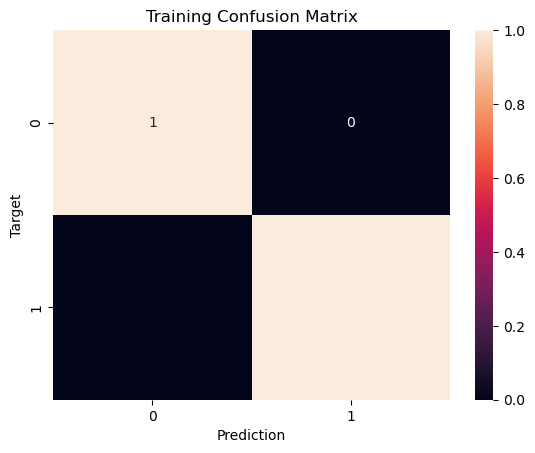

In [78]:
X_train_prediction=predict_and_plot(X_train,Y_train,'Training')

Accuracy: 90.86%


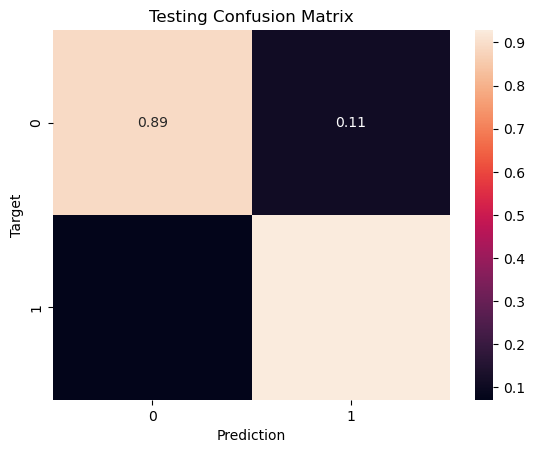

In [79]:
X_test_prediction=predict_and_plot(X_test,Y_test,'Testing')

In [80]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.89      0.93      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

* max_depth
* max_leaf_nodes

### max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [81]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [82]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using model.score

In [83]:
model.score(X_train,Y_train)

0.9453621346886912

In [84]:
model.score(X_test,Y_test)

0.9238578680203046

Great, while the training accuracy of the model has gone down, the testing accuracy of the model has increased significantly.

In [85]:
model.classes_

array([0, 1], dtype=int64)

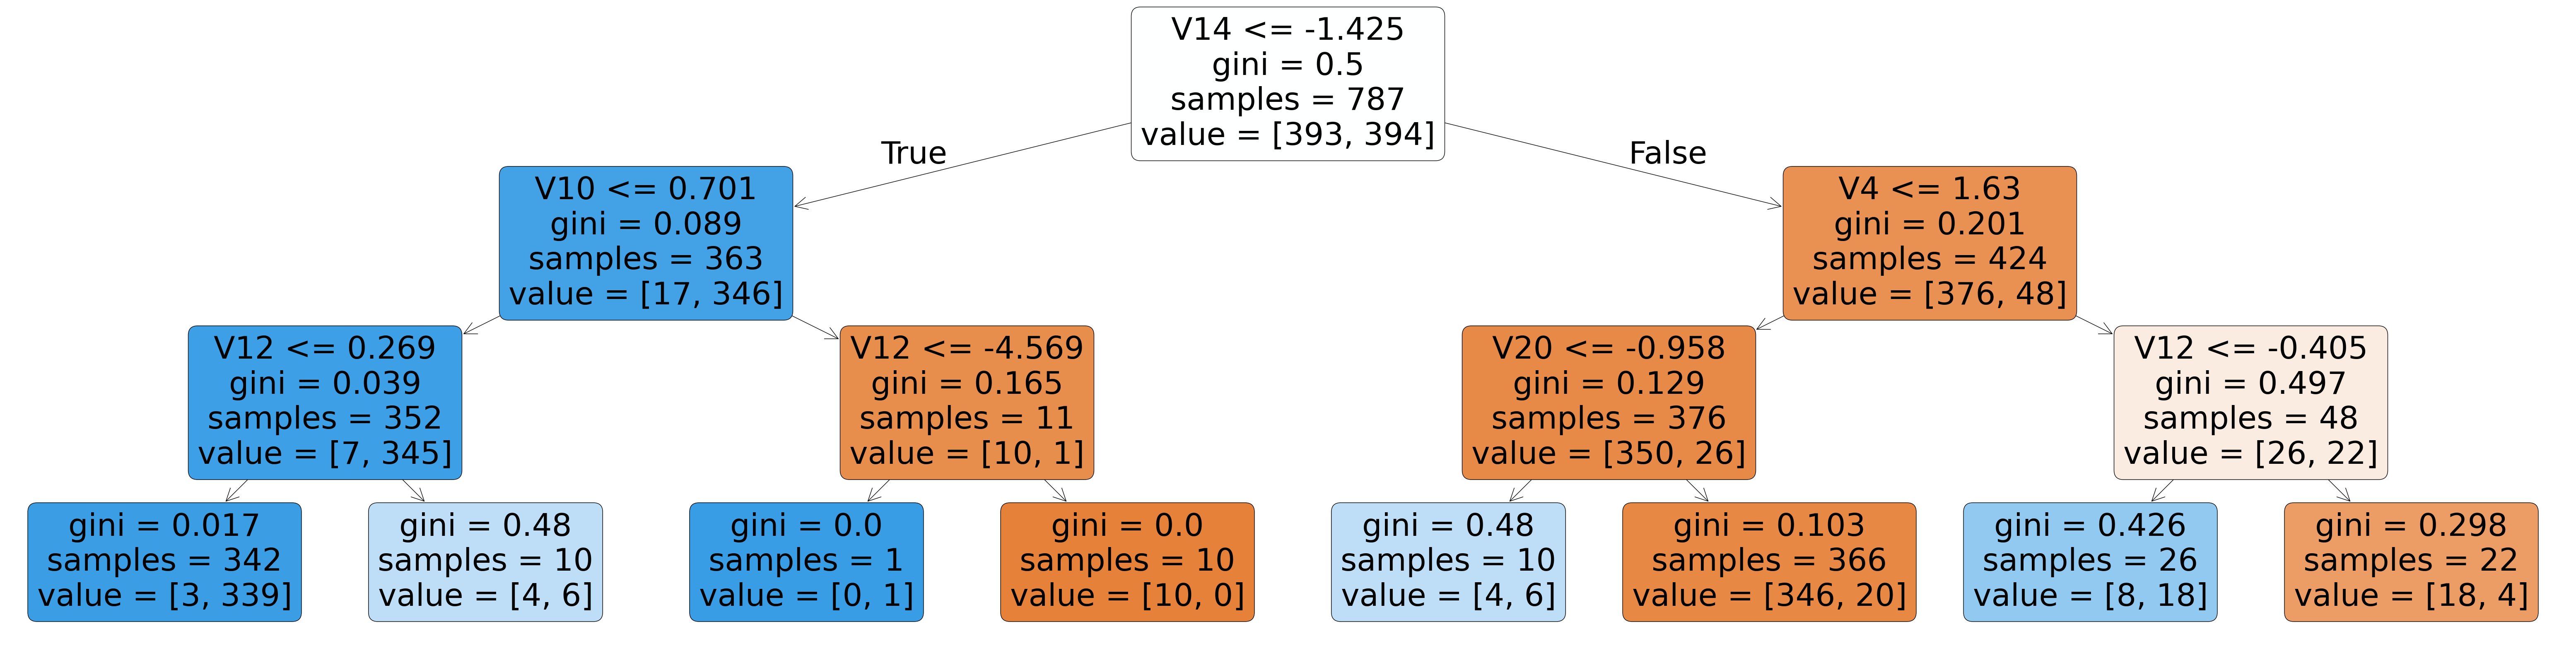

In [86]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,rounded=True);

In [87]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- V14 <= -1.42
|   |--- V10 <= 0.70
|   |   |--- V12 <= 0.27
|   |   |   |--- class: 1
|   |   |--- V12 >  0.27
|   |   |   |--- class: 1
|   |--- V10 >  0.70
|   |   |--- V12 <= -4.57
|   |   |   |--- class: 1
|   |   |--- V12 >  -4.57
|   |   |   |--- class: 0
|--- V14 >  -1.42
|   |--- V4 <= 1.63
|   |   |--- V20 <= -0.96
|   |   |   |--- class: 1
|   |   |--- V20 >  -0.96
|   |   |   |--- class: 0
|   |--- V4 >  1.63
|   |   |--- V12 <= -0.40
|   |   |   |--- class: 1
|   |   |--- V12 >  -0.40
|   |   |   |--- class: 0



In [88]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- V14 <= -1.42
|   |--- V10 <= 0.70
|   |   |--- V12 <= 0.27
|   |   |   |--- class: 1
|   |   |--- V12 >  0.27
|   |   |   |--- class: 1
|   |--- V10 >  0.70
|   |   |--- V12 <= -4.57
|   |   |   |--- class: 1
|   |   |--- V12 >  -4.57
|   |   |   |--- class: 0
|--- V14 >  -1.42
|   |--- V4 <= 1.63
|   |   |--- V20 <= -0.96
|   |   |   |--- class: 1
|   |   |--- V20 >  -0.96
|   |   |   |--- class: 0
|   |--- V4 >  1.63
|   |   |--- V12 <= -0.40
|   |   |   |--- class: 1
|   |   |--- V12 >  -0.40
|   |   |   |--- class: 0



Let's experiment with different depths using a helper function.

In [89]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,Y_train)
    train_acc=1-model.score(X_train,Y_train)
    test_acc=1-model.score(X_test,Y_test)
    return {'Max Depth':md,'Training Error':train_acc,'Testing Error':test_acc}

In [90]:
%%time
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,9)])

Wall time: 143 ms


In [91]:
errors_df

,Max Depth,Training Error,Testing Error
0,1,0.082592,0.071066
1,2,0.071156,0.065990
2,3,0.054638,0.076142
3,4,0.036849,0.081218
4,5,0.025413,0.081218
5,6,0.022872,0.091371
6,7,0.013977,0.086294
7,8,0.006353,0.101523


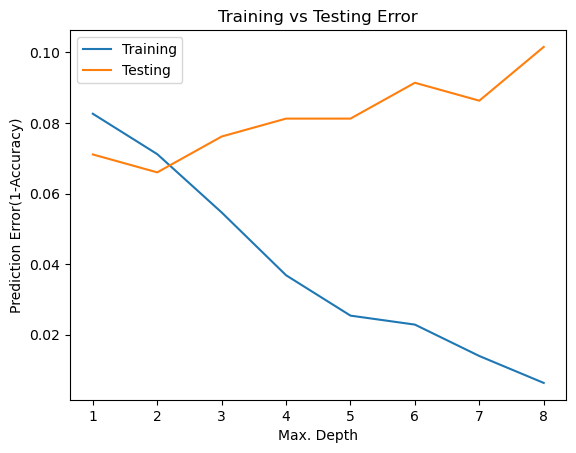

In [92]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training Error'])
plt.plot(errors_df['Max Depth'],errors_df['Testing Error'])
plt.title('Training vs Testing Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training','Testing']);

In the above case, it appears that a maximum depth of 2 results in the lowest validation error.

In [93]:
model=DecisionTreeClassifier(max_depth=2,random_state=42).fit(X_train,Y_train)
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.928843710292249, 0.934010152284264)

### max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [94]:
model=DecisionTreeClassifier(random_state=42,max_leaf_nodes=5)

In [95]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [96]:
model.score(X_train,Y_train)

0.9415501905972046

In [97]:
model.score(X_test,Y_test)

0.9289340101522843

In [98]:
model.tree_.max_depth

3

Notice that the model was able to achieve a greater depth of  for certain paths while keeping other paths shorter.

In [99]:
model_text=export_text(model)   #feature_names=list(X_train.columns)
print(model_text)

|--- feature_14 <= -1.42
|   |--- feature_10 <= 0.70
|   |   |--- class: 1
|   |--- feature_10 >  0.70
|   |   |--- class: 0
|--- feature_14 >  -1.42
|   |--- feature_4 <= 1.63
|   |   |--- class: 0
|   |--- feature_4 >  1.63
|   |   |--- feature_12 <= -0.40
|   |   |   |--- class: 1
|   |   |--- feature_12 >  -0.40
|   |   |   |--- class: 0



## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

A random forest works by averaging/combining the results of several decision trees.

We'll use the RandomForestClassifier class from sklearn.ensemble.

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model=RandomForestClassifier(random_state=42,n_jobs=-1)

n_jobs allows the random forest to use mutiple parallel workers to train decision trees, and random_state=42 ensures that the we get the same results for each execution.

In [102]:
%%time
model.fit(X_train,Y_train)

Wall time: 216 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [103]:
model.score(X_train,Y_train)

1.0

In [104]:
model.score(X_test,Y_test)

0.9543147208121827

Once again, the training accuracy is 100%, but this time the testing accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

We can can access individual decision trees using model.estimators_

In [105]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

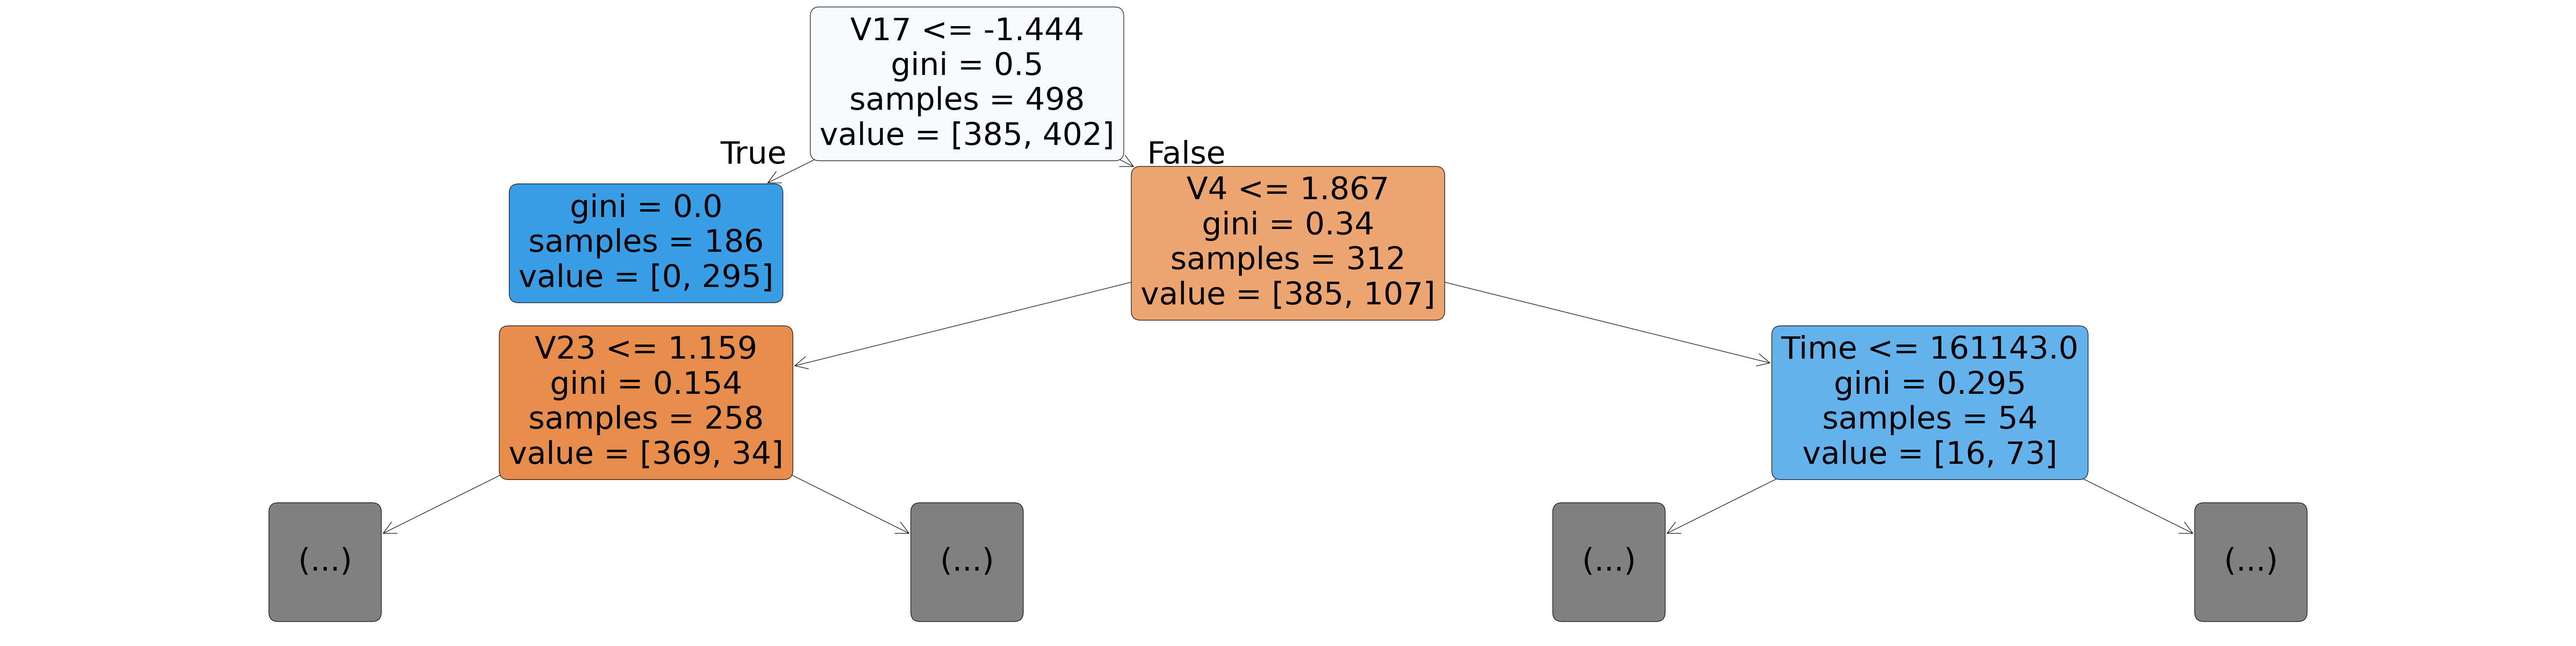

In [106]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True);  

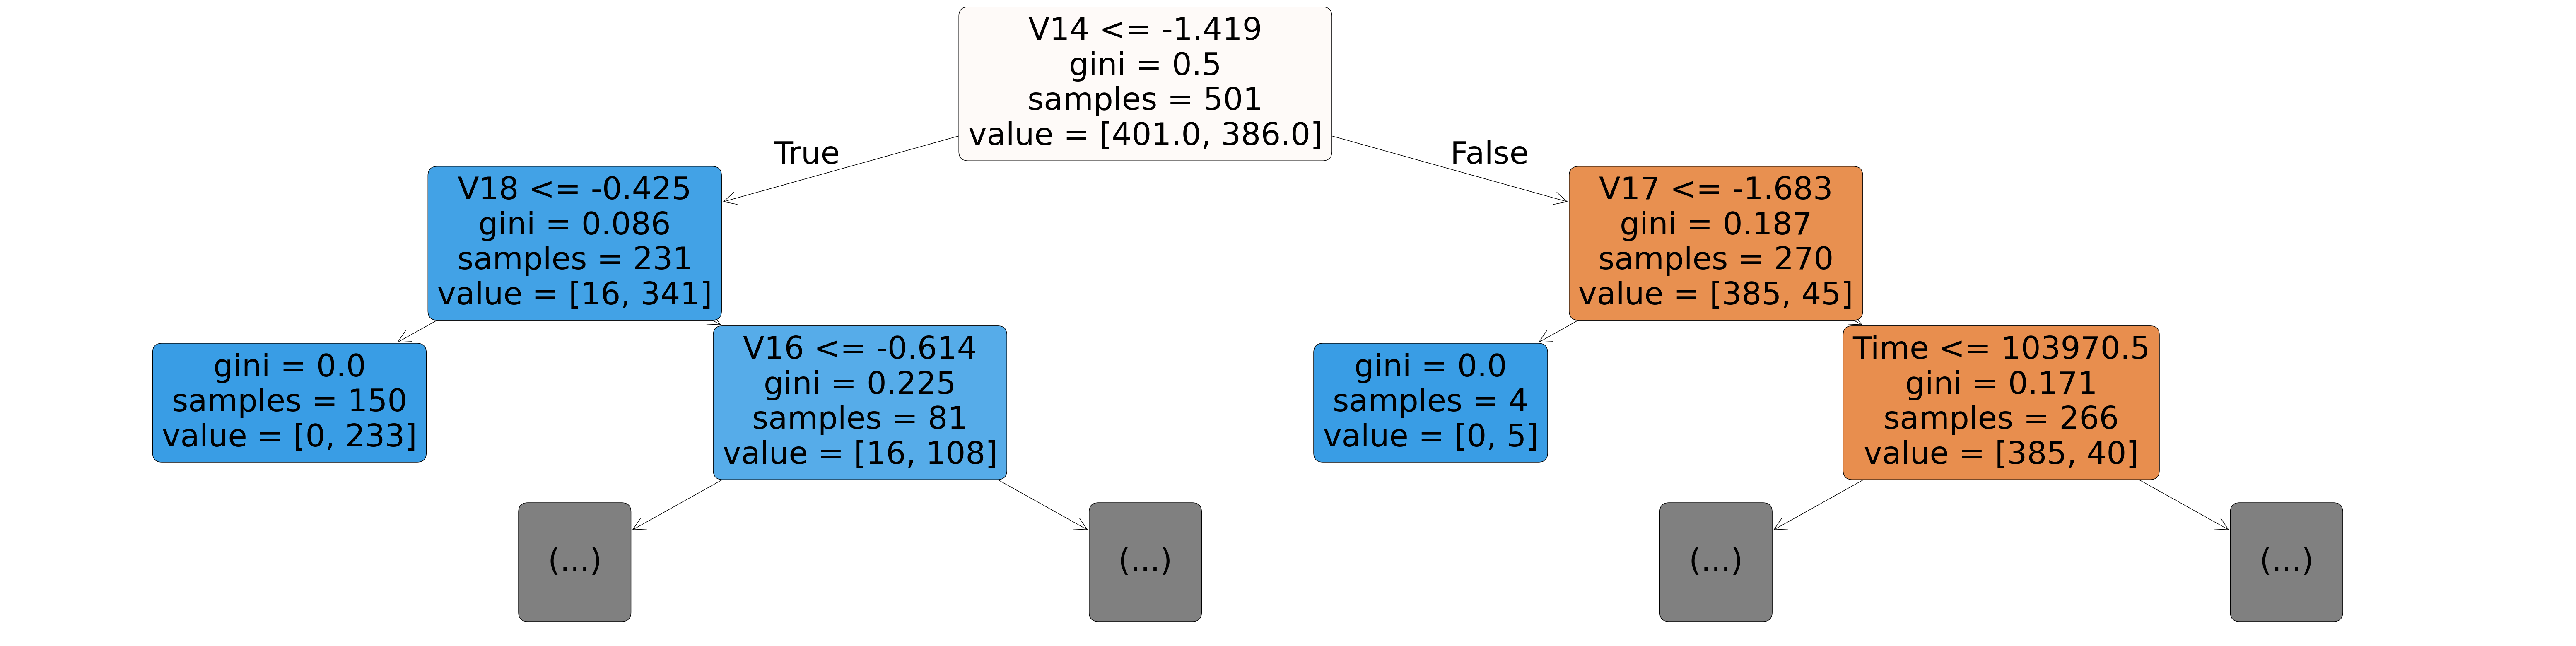

In [107]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True);

In [108]:
len(model.estimators_)

100

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [109]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [110]:
importance_df.head(10)

,feature,importance
14,V14,0.161528
10,V10,0.125449
4,V4,0.099593
17,V17,0.098422
12,V12,0.086614
11,V11,0.061814
3,V3,0.058748
16,V16,0.051637
2,V2,0.039675
9,V9,0.027943


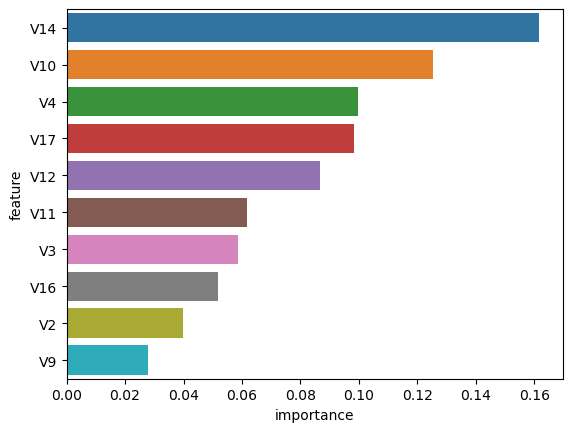

In [111]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

Let's create a base model with which we can compare models with tuned hyperparameters.

In [112]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,Y_train)

In [113]:
base_train_acc=base_model.score(X_train,Y_train)
base_test_acc=base_model.score(X_test,Y_test)

In [114]:
base_accs=base_train_acc,base_test_acc
base_accs

(1.0, 0.9543147208121827)

We can use this as a benchmark for hyperparmeter tuning.

### n_estimators

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

#### 10 estimators

In [115]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

In [116]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [117]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9949174078780177, 0.9543147208121827)

In [118]:
base_accs

(1.0, 0.9543147208121827)

#### 2 estimators

In [119]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=2)

In [120]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=2, n_jobs=-1, random_state=42)

In [121]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9669631512071156, 0.934010152284264)

In [122]:
base_accs

(1.0, 0.9543147208121827)

### max_depth and max_leaf_nodes

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.

Let's define a helper function test_params to make it easy to test hyperparameters.

In [123]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,Y_train)
    return model.score(X_train,Y_train) ,model.score(X_test,Y_test)

Let's test a few values of max_depth and max_leaf_nodes.

In [124]:
test_params(max_depth=2,max_leaf_nodes=128,n_estimators=50)

(0.9326556543837357, 0.949238578680203)

In [125]:
test_params(max_depth=5)

(0.9567979669631512, 0.9593908629441624)

In [126]:
test_params(max_leaf_nodes=2**5)

(0.9923761118170267, 0.9695431472081218)

In [127]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9593908629441624)

In [128]:
base_accs  # no max depth or max leaf nodes

(1.0, 0.9543147208121827)

### max_features
Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

In [129]:
test_params(max_features='log2')

(1.0, 0.9593908629441624)

In [130]:
test_params(max_features=3)

(1.0, 0.9593908629441624)

In [131]:
test_params(max_features=10)

(1.0, 0.9543147208121827)

In [132]:
base_accs

(1.0, 0.9543147208121827)

### min_samples_split and min_samples_leaf

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [133]:
test_params(min_samples_split=2, min_samples_leaf=2)

(0.9936467598475223, 0.9543147208121827)

In [134]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.9250317662007624, 0.9543147208121827)

In [135]:
base_accs

(1.0, 0.9543147208121827)

### min_impurity_decrease

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [136]:
test_params(min_impurity_decrease=1e-7)

(1.0, 0.9543147208121827)

In [137]:
test_params(min_impurity_decrease=1e-2)

(0.9351969504447268, 0.9593908629441624)

In [138]:
base_accs

(1.0, 0.9543147208121827)

### bootstrap, max_samples

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [139]:
test_params(bootstrap=False)

(1.0, 0.9593908629441624)

In [140]:
base_accs

(1.0, 0.9543147208121827)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using max_samples. This can further generalize the model.

In [141]:
test_params(max_samples=.6)

(0.9923761118170267, 0.9593908629441624)

In [142]:
base_accs

(1.0, 0.9543147208121827)

### class_weight

In [143]:
Y_train.value_counts()/len(Y_train)

Class
1    0.500635
0    0.499365
Name: count, dtype: float64

In [144]:
model.classes_

array([0, 1], dtype=int64)

In [145]:
test_params(class_weight='balanced')

(1.0, 0.9644670050761421)

In [146]:
base_accs

(1.0, 0.9543147208121827)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [147]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=60,random_state=42,max_features=8,max_depth=9,
                            min_samples_split=100,min_samples_leaf=90,bootstrap=False,
                             min_impurity_decrease=1e-2)

In [148]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, max_features=8,
                       min_impurity_decrease=0.01, min_samples_leaf=90,
                       min_samples_split=100, n_estimators=60, n_jobs=-1,
                       random_state=42)

In [149]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9263024142312579, 0.9441624365482234)

In [150]:
base_accs

(1.0, 0.9543147208121827)

We've increased the accuracy from 91.7% with a single decision tree to 93.78% with a well-tuned random forest. Also, model is not over-fitted as accuracy score of both training and testing data is nearby with a small difference in between them. This proves that our model is perfect as accuracy score of both training and testing data is above 90% which is a good sign

## Making Predictions on New Inputs

In [151]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [152]:
# Lets create a sample dictionary
new_input={'Time':2,
    'V1':-1.158233,
           'V2':0.877737,
           'V3':1.548718,
           'V4':0.403034,
           'V5':-0.407193,
           'V6':0.095921,
           'V7':0.592941,
           'V8':-0.270533,
           'V9':0.817739,
           'V10':0.753074,
           'V11':-0.822843,
           'V12':0.538196,
           'V13':1.345852,
           'V14':-1.119670,
           'V15':0.175121,
           'V16':-0.451449,
           'V17':-0.237033,
           'V18':-0.038195,
           'V19':0.803487,
           'V20':0.408542,
           'V21':-0.009431,
           'V22':0.798278,
           'V23':-0.137458,
           'V24':0.141267,
           'V25':-0.206010,
           'V26':0.502292,
           'V27':0.219422,
           'V28':0.215153,
           'Amount':69.99
}

In [153]:
# Converting the dictionary into a dataframe
input_df=pd.DataFrame([new_input])
pred=model.predict(input_df)[0]
prob = model.predict_proba(input_df)[0][list(model.classes_).index(pred)]

In [154]:
pred,prob

(0, 0.8678910747484623)

So, we can see that predicted class is 0 by our model which is true as original. Hence, we can say that our model is working fine with a predicting probability of 87% which is also good.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the joblib module to save and load Python objects on the disk.

In [155]:
import joblib

In [156]:
df={
    'model':model,
    'X':X,
    'Y':Y,
    'X_sample':X_sample,
    'Y_sample':y_sample
}

In [157]:
joblib.dump(df, 'df.joblib')

['df.joblib']

## Conculsion



Although there are several fraud detection techniques available today, none is able to detect all frauds completely when they are actually happening, they usually detect it after the fraud has been committed. This happens because a very minuscule number of transactions from the total transactions are actually fraudulent in nature. So we need a technology that can detect the fraudulent transaction when it is taking place so that it can be stopped then and there and that too in a minimum cost. So the major task of today is to build an accurate, precise and fast detecting fraud detection system for credit card frauds that can detect not only frauds happening over the internet like phishing and site cloning but also tampering with the credit card itself i.e. it signals an alarm when the tampered credit card is being used. The major drawback of all the techniques is that they are not guaranteed to give the same results in all environments. They give better results with a particular type of dataset and poor or unsatisfactory results with other type. Thus, the results are purely dependent on the dataset type used.

In our undersample data, our model is unable to detect for a large number of cases, the non fraud transactions correctly and instead, mis-classifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer dissatisfaction will increase. The next step of this analysis will be to do an outlier removal on our undersample dataset and see if our accuracy in the test set improves
.

In this paper, Machine learning technique like Logistic regression, Decision Tree, Random forest classifiers were used to detect the fraud in credit card system. Sensitivity, Specificity, accuracy and error rate are used to evaluate the performance for the proposed system. From the experiments, the result that has been concluded is that Logistic regression has an accuracy of 94.4%,Decision tree shows accuracy of 91.9% and Random forest shows accuracy of 92.9% .. Hence we conclude that Logistic regression is the best model for our system.


# Acknowledgment

I would like to express my gratitude to the UpGrad community and the instructors for providing an excellent Data Science Bootcamp course. Through the comprehensive material, I have gained valuable knowledge in data analysis, exploration, visualization, manipulation, and cleaning. I have also learned various Machine Learning algorithms during the course.

I have completed this project independently. However, I have referred to syntax, methods, and hyperparameters from online resources such as Google, video tutorials, course notebooks, and the official documentation of scikit-learn (sklearn).